In [481]:
import re
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import csv
import re
# https://jobscentral.com.sg/jobs

In [482]:
tuyendung = pd.read_csv("output1.csv")
tuyendung.head()

,post_id,content,images
0,1617317992027704,Facebook đang là một kênh để tiếp cận người tì...,[]
1,1818241725268662,[Hà Nội] Update list job tuyển dụng các vị trí...,[]
2,1818228095270025,[HCM] TUYỂN DỤNG IT HELPDESK\n👉Số lượng: 2 nhâ...,[]
3,1818238245269010,[HCM] Tuyển gấp UNITY ANIMATOR từ 1 NĂM KN. Th...,[]
4,1818237988602369,[HCM] HOT JOB DÀNH CHO Software Engineer (C/C+...,[]


In [483]:
content = tuyendung['content']
content.head(40)

0     Facebook đang là một kênh để tiếp cận người tì...
1     [Hà Nội] Update list job tuyển dụng các vị trí...
2     [HCM] TUYỂN DỤNG IT HELPDESK\n👉Số lượng: 2 nhâ...
3     [HCM] Tuyển gấp UNITY ANIMATOR từ 1 NĂM KN. Th...
4     [HCM] HOT JOB DÀNH CHO Software Engineer (C/C+...
5     [HCM - TÂN BÌNH] 📣 EMESOFT tìm đồng đội gia nh...
6     [HN] Tuyển dụng Junior Backend Developer. Làm ...
7     [VCCORP_HN] Tuyển senior reactJS từ 4 năm kinh...
8     📣📣FPT Software-JOB BOARD THÁNG 3, ỨNG TUYỂN TẸ...
9     CẦU GIẤY- TUYỂN DỤNG IT SUPPORT HỆ THỐNG \nMÔI...
10    Job remote\nCần tuyển IT phù hợp với nội dung ...
11    [Mễ Trì, HN] Cần 2 Web Dev, upto 20M, 1yr+, Sp...
12    [HN] Tuyển dụng Junior Backend Developer. Làm ...
13    GẤP.Hà Nội-Job15\nTuyển 4 Anh chị Senior java\...
14    GÓC TUYỂN DỤNG:\nCÔNG TY cần tuyển dụng vị trí...
15    AVEPOINT TUYỂN DỤNG\nAvePoint - Công ty Global...
16    🔥LG Electronics Việt Nam Hải Phòng tuyển dụng ...
17    TUYỂN DỤNG LẬP TRÌNH VIÊN HỆ THỐNG ERP\nĐị

# Vẽ biểu đồ ngôn ngữ thông dụng

In [484]:
programming_languages = ['Python', 'Java', 'C++', 'JavaScript', 'Ruby', 'Swift', 'Go', 'PHP', 'C#', 'TypeScript', 'R', 'Kotlin', 'Scala', 'Perl', 'HTML', 'CSS']

language_counts = {language: 0 for language in programming_languages}

for content in tuyendung['content']:
    words = re.findall(r'\b\w+\b', content)
    words = [word.lower() for word in words]
    for language in programming_languages:
        if language.lower() in words:
            language_counts[language] += 1

language_counts_df = pd.DataFrame.from_dict(language_counts, orient='index', columns=['Count'])

language_counts_df = language_counts_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
language_counts_df.plot(kind='bar', color='skyblue')
plt.title('Programming Languages Usage')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: expected string or bytes-like object

# Tạo thuộc tính mới từ text -> Vị trí làm việc, email , ngôn ngữ yêu cầu

### Location 

In [ ]:
def read_locations_file(locations_file):
    with open(locations_file, 'r', encoding='utf-8') as file:
        locations = [line.strip() for line in file]
    return locations

def add_location_to_csv(input_csv, locations_file, output_csv):
    locations = read_locations_file(locations_file)
    output_data = []

    with open(input_csv, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            content = row['content'].lower()  
            location = find_location(content, locations)
            row['location'] = location
            output_data.append(row)

    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['post_id', 'content', 'location', 'images']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in output_data:
            writer.writerow(row)

def find_location(content, locations):
    for location in locations:
        if location.lower() in content:
            return location
    return 'Unknown'


### Email

In [ ]:
def extract_email(text):
    pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
    emails = re.findall(pattern, text)
    return emails[0] if emails else 'Unknown'

def update_analyzed_data_with_email(input_csv_file, output_csv_file):
    with open(input_csv_file, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    for row in rows:
        row['email'] = extract_email(row['content'])

    with open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
        fieldnames = ['post_id', 'content', 'images', 'email', 'location']
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

# Ngôn ngữ lập trình

In [ ]:
def addProgrammingLanguagesToCSV(input_csv, programming_languages_file, output_csv):
    with open(input_csv, 'r', newline='', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    with open(programming_languages_file, 'r', encoding='utf-8') as lang_file:
        programming_languages = [line.strip() for line in lang_file]

    fieldnames = reader.fieldnames + programming_languages

    for row in rows:
        content = row['content']
        for lang in programming_languages:
            if re.search(r'\b{}\b'.format(re.escape(lang)), content, flags=re.IGNORECASE):
                row[lang] = '1'
            else:
                row[lang] = '0'

    with open(output_csv, 'w', newline='', encoding='utf-8') as output_file:
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)


# Trình độ 

In [ ]:
def addLevelToCSV(input_csv, level_file, output_csv):
    with open(input_csv, 'r', newline='', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    with open(level_file, 'r', encoding='utf-8') as lang_file:
        levels = [line.strip() for line in lang_file]

    fieldnames = reader.fieldnames + levels

    for row in rows:
        content = row['content']
        for lang in levels:
            if re.search(r'\b{}\b'.format(re.escape(lang)), content, flags=re.IGNORECASE):
                row[lang] = '1'
            else:
                row[lang] = '0'

    with open(output_csv, 'w', newline='', encoding='utf-8') as output_file:
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)


# Ngoại ngữ yêu cầu 

In [ ]:
def addLanguagesRequirementToCSV(input_csv, output_csv):
    # Danh sách các từ khóa hoặc biểu thức chính quy cho mỗi ngôn ngữ
    languages_keywords = {
        'Tiếng Anh': r'\b(English|Eng|AV|Anh)\b',
        'Tiếng Nhật': r'\b(Japanese|Japanse|Nhật)\b',
        'Tiếng Trung': r'\b(Chinese|Trung)\b'
    }

    with open(input_csv, 'r', newline='', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    # Tạo danh sách các trường mới cho các ngôn ngữ
    languages = list(languages_keywords.keys())

    fieldnames = reader.fieldnames + languages

    for row in rows:
        content = row['content']
        for lang, keyword_pattern in languages_keywords.items():
            if re.search(keyword_pattern, content, flags=re.IGNORECASE):
                row[lang] = '1'
            else:
                row[lang] = '0'

    with open(output_csv, 'w', newline='', encoding='utf-8') as output_file:
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

# Mảng chuyên

In [ ]:
def addMajorsToCSV(input_csv, major_file, output_csv):
    with open(input_csv, 'r', newline='', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    with open(major_file, 'r', encoding='utf-8') as lang_file:
        majors= [line.strip() for line in lang_file]

    fieldnames = reader.fieldnames + majors
    for row in rows:
        content = row['content']
        for lang in majors:
            if re.search(r'\b{}\b'.format(re.escape(lang)), content, flags=re.IGNORECASE):
                row[lang] = '1'
            else:
                row[lang] = '0'

    with open(output_csv, 'w', newline='', encoding='utf-8') as output_file:
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)


# Lương

In [522]:
def extract_salary(text):
    patterns = [
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*m',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*tr',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*triệu\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*triệu',
    r'\b(?P<min_salary>\d{1,2})\s*million\s*-\s*(?P<max_salary>\d{1,2})\s*million\b',
    r'\b(?P<min_salary>\d{1,2})\s*m\s*-\s*(?P<max_salary>\d{1,2})\s*m\b',
    r'\b(?P<min_salary>\d{1,2})\s*triệu\s*-\s*(?P<max_salary>\d{1,2})\s*triệu\b',
    r'\b(?P<min_salary>\d{1,2})\s*-\s*(?P<max_salary>\d{1,2})\s*m\b',
    r'\b(?P<min_salary>\d{1,2})\s*-\s*(?P<max_salary>\d{1,2})\s*tr\b',
    r'\b(?P<min_salary>\d{1,2})\s*-\s*(?P<max_salary>\d{1,2})\s*triệu\b',
    r'\b(?P<min_salary>\d{1,2})\s*-\s*(?P<max_salary>\d{1,2})\s*đ\b',
    r'\b(?P<min_salary>\d{1,2})\s*-\s*(?P<max_salary>\d{1,2})\s*đồng\b',
    r'\b(?P<min_salary>\d{1,2})\s*tr\s*-\s*(?P<max_salary>\d{1,2})\s*tr\b',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*vnd',
    r'\b(?P<min_salary>\d{1,2})\s*triệu\s*đến\s*(?P<max_salary>\d{1,2})\s*triệu\b',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*vnd\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)vnd',
    r'(?P<min_salary>\d{1,2})m\s*-(?P<max_salary>\d{1,2})m\b',
    r'\b(?P<min_salary>\d{1,2})\s*đến\s*(?P<max_salary>\d{1,2})\s*triệu\b',
    r'\b(?P<min_salary>\d{1,2})\s*đến\s*(?P<max_salary>\d{1,2})\s*tr\b',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)',
    r'(?:up\s*to)?\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*m',
    r'\$(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*\$(?P<max_salary>\d{1,2}(?:\.\d{3})?)',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\$\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\$',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*\$(?P<max_salary>\d{1,2}(?:\.\d{3})?)',
    r'\$(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)',
    r'minusd(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*-\s*maxusd(?P<max_salary>\d{1,2}(?:\.\d{3})?)',
    r'(?P<min_salary>\d{1,2}(?:\.\d{3})?)\s*USD\s*-\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*USD',
    r'(?P<min_salary>\d{1,2})\s*-\s*(?P<max_salary>\d{1,2})\s*USD',
    r'(?P<min_salary>\d{1,2})\s*USD\s*-\s*(?P<max_salary>\d{1,2})\s*USD',
    r'(?:\bup\s*to|\bupto)\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*tr',
    r'(?:\bup\s*to|\bupto)\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*triệu',
    r'(?:\bup\s*to|\bupto)\s*(?P<max_salary>\d{1,2}(?:\.\d{3})?)\s*usd',
    r'lên\s+đến|up\s+to\s*\$?(?P<max_salary>\d{1,3}(?:,\d{3})*|\d{1,3})\s*usd?',
    r'lên\s+đến|up\s+to\s*(?P<max_salary>\d{1,2}(?:\.\d{3})*(?:\.\d+)?)\s*vnđ',
    r'lên\s+đến|up\s+to\s*(?P<max_salary>\d{1,2}(?:\.\d{3})*(?:\.\d+)?)\s*vnd',
    r'(?:upto|up\s*to)\s*(?P<max_salary>\d{1,3}(?:\.\d{3})*(?:\.\d+)?)\s*m'
]


    
    for pattern in patterns:
        matches = re.findall(pattern, text.lower())
        if matches:
            if len(matches[0]) == 2:  # Nếu có cả minSalary và maxSalary
                min_salary = float(matches[0][0]) * 1000000 if 'triệu' in pattern or 'm' in pattern or 'tr' in pattern or  '.000.000 ' in pattern else float(matches[0][0]) * 25000
                max_salary = float(matches[0][1]) * 1000000 if 'triệu' in pattern or 'm' in pattern or 'tr' in pattern or '.000.000 ' in pattern else float(matches[0][1]) * 25000
                avg_salary = (min_salary + max_salary) / 2
                return min_salary, max_salary, avg_salary
            elif len(matches[0]) == 1:  # Nếu chỉ có maxSalary
                max_salary = float(matches[0][0]) * 1000000 if 'triệu' or 'm' in pattern or 'tr' in pattern in pattern or '.000.000 ' in pattern  else float(matches[0][0]) * 25000
                return 0, max_salary, 0
    return 0, 0, 0



def add_salary_columns(input_csv_file, output_csv_file):
    with open(input_csv_file, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    for row in rows:
        min_salary, max_salary, avg_salary = extract_salary(row['content'])
        row['minSalary'] = min_salary
        row['maxSalary'] = max_salary
        row['avgSalary'] = avg_salary

    with open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
        fieldnames = reader.fieldnames + ['minSalary','maxSalary','avgSalary']
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

# Năm kinh nghiệm

In [523]:
def extract_experience(text):
    pattern = r'(\d+)\s*(?=\s*năm)'
    experience = re.findall(pattern, text)
    return experience[0] if experience else '-1'
def update_analyzed_data_with_experience(input_csv_file, output_csv_file):
    with open(input_csv_file, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    for row in rows:
        row['experience'] = extract_experience(row['content'].lower())

    with open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
        fieldnames = ['post_id', 'content', 'images', 'email', 'location','minSalary', 'maxSalary', 'avgSalary' ,'experience']
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)


# Trích điện thoại

In [524]:
def extract_phonenumber(text):
    pattern = r'(?<!\d)(?:0|\+84|84)(?:\d(?:\s|\.)?){9,10}\b'
    phone_numbers = re.findall(pattern, text)
    return phone_numbers[0] if phone_numbers else 'Unknown'
def addPhonenumberToCSV(input_csv_file, output_csv_file):
    with open(input_csv_file, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)
        rows = list(reader)

    for row in rows:
        row['phonenumber'] = extract_phonenumber(row['content'])

    with open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
        fieldnames = ['post_id', 'content', 'images', 'email', 'location', 'minSalary', 'maxSalary', 'avgSalary', 'experience', 'phonenumber']
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)


In [525]:
input_csv = 'output1.csv'  
locations_file = './Vietnamese-data/Vietnam GIS data/Vnlocations.txt' 
programming_languages_file = './Vietnamese-data/ProgramLanguages.txt'
languages_requirement_file = './Vietnamese-data/ForeginLanguagues'
majors_file = './Vietnamese-data/Major.txt'
level_file = './Vietnamese-data/Level.txt'
output_csv = 'analyzed_data.csv'  


In [526]:
add_location_to_csv(input_csv, locations_file, output_csv)
update_analyzed_data_with_email(output_csv, output_csv)
add_salary_columns(output_csv,output_csv)
update_analyzed_data_with_experience(output_csv,output_csv)
addPhonenumberToCSV(output_csv,output_csv)
addProgrammingLanguagesToCSV(output_csv, programming_languages_file, output_csv)
addLevelToCSV(output_csv,level_file,output_csv)
addLanguagesRequirementToCSV(output_csv,output_csv)
addMajorsToCSV(output_csv,majors_file,output_csv)

# Training model 

In [527]:
data = pd.read_csv("analyzed_data.csv")
data.columns

Index(['post_id', 'content', 'images', 'email', 'location', 'minSalary',
       'maxSalary', 'avgSalary', 'experience', 'phonenumber', 'Python', 'Java',
       'JavaScript', 'C++', 'C#', 'PHP', 'Ruby', 'Swift', 'TypeScript', 'Go',
       'Kotlin', 'Rust', 'Lua', 'Perl', 'SQL', 'HTML', 'CSS', 'R', 'MATLAB',
       'Shell', 'Assembly', '.NET', 'C', 'Intern', 'Fresher', 'Senior',
       'Junior', 'Middle', 'Associate', 'Manager', 'Director', 'Principal',
       'Lead', 'Tiếng Anh', 'Tiếng Nhật', 'Tiếng Trung', 'Web', 'Android',
       'IOS', 'Backend', 'Frontend', 'Machine Learning', 'Data', 'Game',
       'Embedded', 'Network', 'Computer Science', 'Software', 'Security',
       'Robot', 'Cloud', 'AI', 'Nhúng', 'Bridge', 'Software.1', 'Designer',
       'Scrum', 'BrSE', 'Tester', 'Comtor'],
      dtype='object')

In [528]:
features =  ['location', 'experience', 'phonenumber', 'Python', 'Java',
       'JavaScript', 'C++', 'C#', 'PHP', 'Ruby', 'Swift', 'TypeScript', 'Go',
       'Kotlin', 'Rust', 'Lua', 'Perl', 'SQL', 'HTML', 'CSS', 'R', 'MATLAB',
       'Shell', 'Assembly', '.NET', 'C', 'Intern', 'Fresher', 'Senior',
       'Junior', 'Middle', 'Associate', 'Manager', 'Director', 'Principal',
       'Lead', 'Web',
       'Android', 'IOS', 'Backend', 'Frontend', 'Machine Learning', 'Data',
       'Game', 'Embedded', 'Network', 'Computer Science', 'Software',
       'Security', 'Robot', 'Cloud', 'AI', 'Nhúng', 'Bridge', 'Software.1',
       'Designer', 'Scrum', 'BrSE', 'Tester', 'Comtor']

In [529]:
X = data[features]
X.head()

,location,experience,phonenumber,Python,Java,JavaScript,C++,C#,PHP,Ruby,...,Cloud,AI,Nhúng,Bridge,Software.1,Designer,Scrum,BrSE,Tester,Comtor
0,Unknown,-1,Unknown,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hà Nội,2,Unknown,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,HCM,1,0917196639,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HCM,1,Unknown,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HCM,3,Unknown,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [530]:
y = data['maxSalary']
y.head()

0           0.0
1     5000000.0
2    10000000.0
3           0.0
4           0.0
Name: maxSalary, dtype: float64

In [531]:
from sklearn.model_selection import train_test_split
print(data.columns)

Index(['post_id', 'content', 'images', 'email', 'location', 'minSalary',
       'maxSalary', 'avgSalary', 'experience', 'phonenumber', 'Python', 'Java',
       'JavaScript', 'C++', 'C#', 'PHP', 'Ruby', 'Swift', 'TypeScript', 'Go',
       'Kotlin', 'Rust', 'Lua', 'Perl', 'SQL', 'HTML', 'CSS', 'R', 'MATLAB',
       'Shell', 'Assembly', '.NET', 'C', 'Intern', 'Fresher', 'Senior',
       'Junior', 'Middle', 'Associate', 'Manager', 'Director', 'Principal',
       'Lead', 'Tiếng Anh', 'Tiếng Nhật', 'Tiếng Trung', 'Web', 'Android',
       'IOS', 'Backend', 'Frontend', 'Machine Learning', 'Data', 'Game',
       'Embedded', 'Network', 'Computer Science', 'Software', 'Security',
       'Robot', 'Cloud', 'AI', 'Nhúng', 'Bridge', 'Software.1', 'Designer',
       'Scrum', 'BrSE', 'Tester', 'Comtor'],
      dtype='object')


In [532]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# data_filtered = data.loc[data['maxSalary'] != 0]
data_filtered = data.loc[(data['maxSalary'] != 0) &
                     #      &((data['Python'] == 1) | (data['Java'] == 1) | (data['JavaScript'] == 1) | 
                     #      (data['C++'] == 1) | (data['C#'] == 1) | (data['PHP'] == 1) | 
                     #      (data['Ruby'] == 1) | (data['Swift'] == 1) | (data['TypeScript'] == 1) | 
                     #      (data['Go'] == 1) | (data['Kotlin'] == 1) | (data['Rust'] == 1) | 
                     #      (data['Lua'] == 1) | (data['Perl'] == 1) | (data['SQL'] == 1) | 
                     #      (data['HTML'] == 1) | (data['CSS'] == 1) | (data['R'] == 1) | 
                     #      (data['MATLAB'] == 1) | (data['Shell'] == 1) | (data['Assembly'] == 1) | 
                     #      (data['.NET'] == 1) | (data['C'] == 1)) &
                         ((data['Intern'] == 1) | (data['Fresher'] == 1) | (data['Senior'] == 1) | 
                          (data['Junior'] == 1) | (data['Middle'] == 1) | (data['Associate'] == 1) | 
                          (data['Manager'] == 1) | (data['Director'] == 1) | (data['Principal'] == 1) | 
                          (data['Lead'] == 1))]
                     #     & ((data['Web'] == 1) | (data['Android'] == 1) | (data['IOS'] == 1) | 
                     #      (data['Backend'] == 1) | (data['Frontend'] == 1) | (data['Machine Learning'] == 1) | 
                     #      (data['Data'] == 1) | (data['Game'] == 1) | (data['Embedded'] == 1) | 
                     #      (data['Network'] == 1) | (data['Computer Science'] == 1) | (data['Software'] == 1) | 
                     #      (data['Security'] == 1) | (data['Robot'] == 1) | (data['Cloud'] == 1) | 
                     #      (data['AI'] == 1) | (data['Nhúng'] == 1) | (data['Bridge'] == 1) | 
                     #      (data['Software.1'] == 1) | (data['Designer'] == 1) | (data['Scrum'] == 1) | 
                     #      (data['BrSE'] == 1) | (data['Tester'] == 1) | (data['Comtor'] == 1))]

# Check the filtered data
print(data_filtered)

# Define features
features = [ 'experience', 'Python', 'Java',
       'JavaScript', 'C++', 'C#', 'PHP', 'Ruby', 'Swift', 'TypeScript', 'Go',
       'Kotlin', 'Rust', 'Lua', 'Perl', 'SQL', 'HTML', 'CSS', 'R', 'MATLAB',
       'Shell', 'Assembly', '.NET', 'C', 'Intern', 'Fresher', 'Senior',
       'Junior', 'Middle', 'Associate', 'Manager', 'Director', 'Principal',
       'Lead', 'Tiếng Anh', 'Tiếng Nhật', 'Tiếng Trung', 'Web', 'Android',
       'IOS', 'Backend', 'Frontend', 'Machine Learning', 'Data', 'Game',
       'Embedded', 'Network', 'Computer Science', 'Software', 'Security',
       'Robot', 'Cloud', 'AI', 'Nhúng', 'Bridge', 'Software.1', 'Designer',
       'Scrum', 'BrSE', 'Tester', 'Comtor']

# Assign features and target
X = data_filtered[features]
y = data_filtered['maxSalary']

# Chia dữ liệu thành tập huấn luyện và tập thử nghiệm
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


               post_id                                            content  \
7     1818225521936949  [VCCORP_HN] Tuyển senior reactJS từ 4 năm kinh...   
18    1818181881941313  Chào cả nhà! Nay mình có 01 job IT xịn xò cho ...   
25    1809898236103011  #HCM #Japanese\n1. Senior Business Analyst (Ja...   
37    1818108485281986  TUYỂN DỤNG JUNIOR WORDPRESS\n15.000.000 - 18.0...   
38    1817037578722410  [HCM] Cần tìm 30+ các bạn Fresher Technical Su...   
...                ...                                                ...   
2474  1785873851838783  [HN|HCM|ĐN] List job tiếng Nhật 3 miền với Ben...   
2482  1784655905293911  🎉 [HN - Junior/Middle/Senior] Lấy ngay cơ hộ...   
2488  1784697918623043  [CẦU GIẤY - HN] CẦN GẤP MIDDLE - SENIOR ANDROI...   
2490  1744445919314910  📣📣Việc làm IT lương cao dành cho các ứng viên ...   
2492  1764199397339562  📣📣Việc làm IT lương cao dành cho các ứng viên ...   

     images                 email    location   minSalary   maxSalary  \
7 

In [533]:
print("Số lượng dữ liệu huấn luyện:", X_train.shape[0])


Số lượng dữ liệu huấn luyện: 232


In [534]:
dt_model = DecisionTreeRegressor(random_state = 1 )
dt_model.fit(X_train , y_train)
y_preds = dt_model.predict(X_valid)


In [535]:
y_preds = dt_model.predict(X_valid)

In [536]:
pd.DataFrame({'y' : y_valid, 'y_preds' : y_preds.round()})

,y,y_preds
493,45000000.0,45000000.0
1067,5000000.0,5000000.0
1597,12000000.0,12000000.0
1859,5000000.0,20000000.0
2338,5000000.0,50000000.0
370,40000000.0,40000000.0
2373,6000000.0,1000000.0
1904,3000000.0,3000000.0
122,30000000.0,30000000.0
188,6000000.0,6000000.0


In [537]:
print("Số lượng phần tử trong y_valid:", len(y_valid))
print("Số lượng phần tử trong y_preds:", len(y_preds))

# Tạo DataFrame từ dictionary
df = pd.DataFrame({'y': y_valid, 'y_preds': y_preds.round()})

# Kiểm tra số lượng chỉ mục của DataFrame
print("Số lượng chỉ mục của DataFrame:", len(df))

Số lượng phần tử trong y_valid: 58
Số lượng phần tử trong y_preds: 58
Số lượng chỉ mục của DataFrame: 58


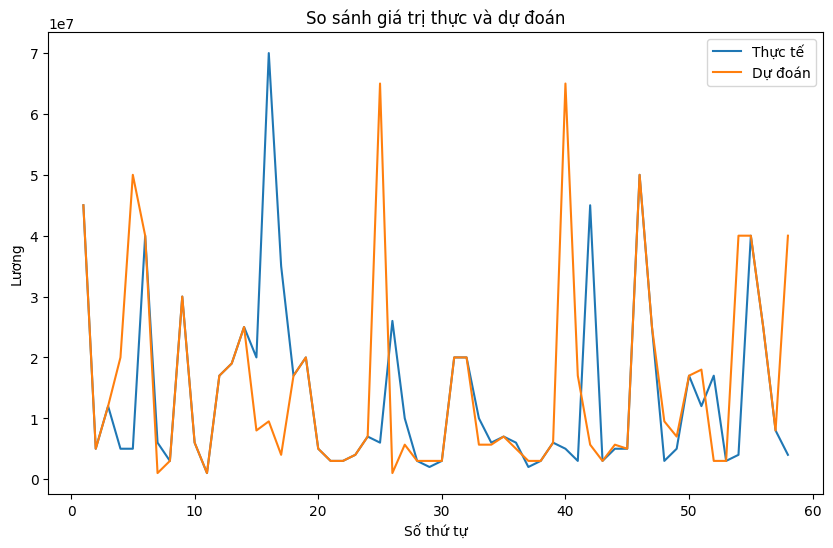

In [541]:
# Tạo một mảng số nguyên từ 1 đến số lượng mẫu dữ liệu
index = range(1, len(y_valid) + 1)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(index, y_valid, label='Thực tế')
plt.plot(index, y_preds, label='Dự đoán')
plt.xlabel('Số thứ tự')
plt.ylabel('Lương')
plt.title('So sánh giá trị thực và dự đoán')
plt.legend()
plt.show()


In [539]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state= 1 )
rf_model.fit(X_train,y_train)


RandomForestRegressor(random_state=1)

In [540]:
rf_val_preds = rf_model.predict(X_valid)
rf_val_preds[:5]
X_valid.head()

,experience,Python,Java,JavaScript,C++,C#,PHP,Ruby,Swift,TypeScript,...,Cloud,AI,Nhúng,Bridge,Software.1,Designer,Scrum,BrSE,Tester,Comtor
493,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1067,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1859,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2338,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


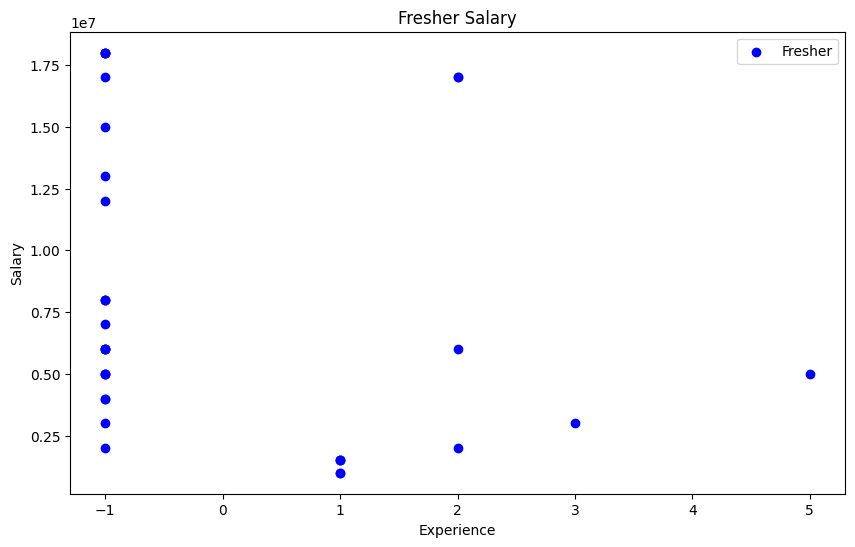

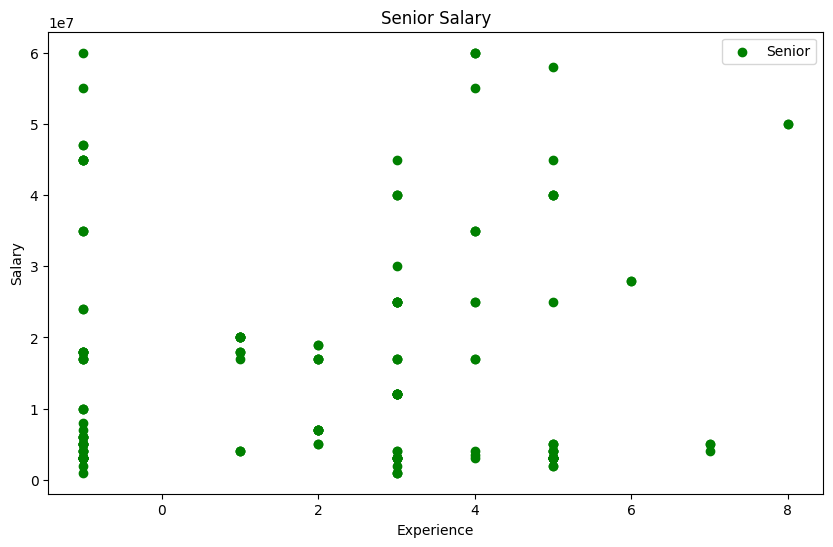

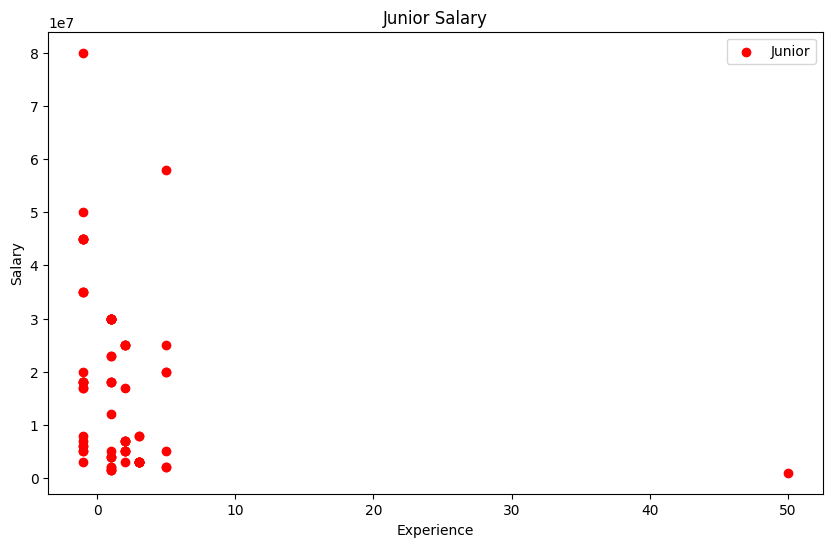

In [542]:
data_fresher = data_filtered[data_filtered['Fresher'] == 1]

data_senior = data_filtered[data_filtered['Senior'] == 1]

data_junior = data_filtered[data_filtered['Junior'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(data_fresher['experience'], data_fresher['maxSalary'], color='blue', label='Fresher')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Fresher Salary')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_senior['experience'], data_senior['maxSalary'], color='green', label='Senior')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Senior Salary')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_junior['experience'], data_junior['maxSalary'], color='red', label='Junior')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Junior Salary')
plt.legend()
plt.show()


# Dự đoán tin tuyển dụng chưa có thông tin về lương


In [548]:
data_missing_maxSalary = data[data['maxSalary'] == 0]
X_missing_maxSalary = data_missing_maxSalary[features]

y_missing_maxSalary = rf_model.predict(X_missing_maxSalary).round()
df_missing_maxSalary = data_missing_maxSalary.copy()
df_missing_maxSalary['Predicted_maxSalary'] = y_missing_maxSalary
fresher_missing_maxSalary = df_missing_maxSalary[df_missing_maxSalary['Fresher'] == 1]

print("Thông tin của những người là Fresher mà chưa biết maxSalary:")
print(fresher_missing_maxSalary[['content', 'Predicted_maxSalary']])

print("Thông tin của các tin tuyển dụng có maxSalary = 0 cùng với dự đoán maxSalary:")
print(df_missing_maxSalary[['content', 'Predicted_maxSalary']])

print("Dự đoán maxSalary cho những phần tử có maxSalary = 0:")
print(y_missing_maxSalary)

Thông tin của những người là Fresher mà chưa biết maxSalary:
                                                content  Predicted_maxSalary
0     Facebook đang là một kênh để tiếp cận người tì...            6650000.0
31    [HCM] iTechwx tung ra những ĐÃI NGỘ HẤP DẪN nh...            9870000.0
62    [HN] Bắt đầu hành trình sự nghiệp tại DTS Soft...           11970000.0
68    [DTL Rec] CƠ HỘI THÚ VỊ ĐÃ CÓ TẠI DYTECHLAB!!\...           16030000.0
107   [Hà Nội/ #Fresher/ #Junior] BSS Group tuyển dụ...            8795000.0
...                                                 ...                  ...
2246  [HN] RPSoft đang mở rộng đội ngũ cho các #Fres...           15780000.0
2322  [HCM/Fresher] 📢📢📢ReactJS/ NodeJS - Web - Appli...            9850000.0
2348  [HN] RPSoft đang mở rộng đội ngũ cho các #Fres...           15780000.0
2365  [HCM/Fresher] ReactJS/ NodeJS - Web - Applicat...            9850000.0
2414  Hiring Fresher Game Developer Remote\nLương: t...            7655000.0

[109 rows x 2 